In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from helper import *

In [2]:
trades_df2016, trades_df2011, trades_df2006, trades_df2001, trades_Total, gasTrades_Total, coalTrades_Total, oilTrades_Total = get_data()


In [3]:
G = genGraph4Year(oilTrades_Total, 2000)[0]

In [4]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 225
Number of edges: 6263
Average in degree:  27.8356
Average out degree:  27.8356


In [5]:
def numOfNodes(dataFrame):
    final = list()
    for i in range(2000,2017):
        G = genGraph4Year(dataFrame, i)[0]
        final.append((i, nx.number_of_nodes(G)))
    return final
        

In [6]:
oilN = numOfNodes(oilTrades_Total)
year,nodesOil = zip(*oilN)

gasN = numOfNodes(gasTrades_Total)
year,nodesGas = zip(*gasN)

coalN = numOfNodes(coalTrades_Total)
year,nodesCoal = zip(*coalN)


uniqueExporterISO3 =trades_Total['Exporter ISO3'].unique()
mapEx2Row = dict(zip(uniqueExporterISO3, range(0,len(uniqueExporterISO3))))

gasDegree = genDegreeMatrix4AllYears(gasTrades_Total, mapEx2Row)
coalDegree = genDegreeMatrix4AllYears(coalTrades_Total, mapEx2Row)
oilDegree = genDegreeMatrix4AllYears(oilTrades_Total, mapEx2Row)
totalDegree = genDegreeMatrix4AllYears(trades_Total, mapEx2Row)


degreeInfo = {}
degreeInfo['Gas'] = inDoutDtotD(gasDegree, v=2)
degreeInfo['Oil'] = inDoutDtotD(oilDegree, v=2)
degreeInfo['Coal'] = inDoutDtotD(coalDegree, v=2)

In [7]:
degreeInfo['Gas']['in_percentile']

[(0.0, 34.25),
 (0.0, 36.0),
 (0.0, 37.25),
 (0.0, 39.25),
 (0.0, 41.0),
 (0.0, 44.25),
 (0.0, 46.25),
 (0.0, 50.0),
 (0.0, 50.5),
 (0.0, 55.75),
 (0.0, 54.5),
 (0.0, 53.0),
 (0.0, 56.25),
 (0.0, 59.75),
 (0.0, 58.75),
 (0.0, 58.5),
 (0.0, 56.5)]

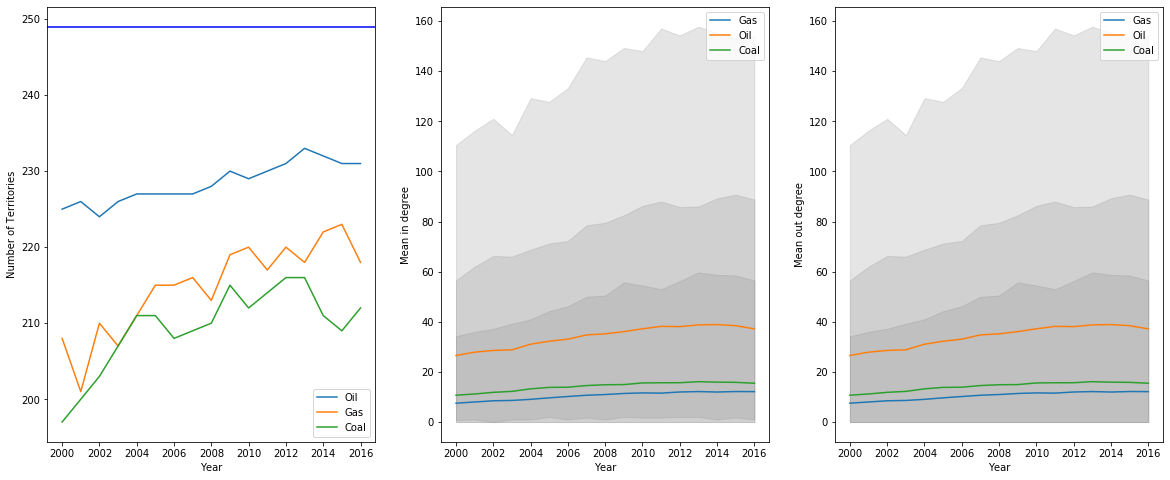

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))

fuels = ['Gas', 'Oil', 'Coal']

ax1.plot(year, nodesOil, label = 'Oil')
ax1.plot(year, nodesGas, label = 'Gas')
ax1.plot(year, nodesCoal, label = 'Coal')
ax1.axhline(y=249, color = 'b')
ax1.legend()
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Territories')


substring='in_'
for i, fuel in enumerate(fuels):
    percentile = degreeInfo[fuel][substring+'percentile']
    prcnt_5 = [i[0] for i in percentile]
    prcnt_95 = [i[1] for i in percentile]
    mean = degreeInfo[fuel][substring+'mean']
    years = degreeInfo[fuel]['year']
    ax2.plot(years, mean, label=fuel)
    ax2.fill_between(years, prcnt_5, prcnt_95, color='gray', alpha=0.2)



ax2.set_xlabel('Year')
ax2.set_ylabel('Mean '+substring[:-1]+' degree')
ax2.legend()



substring='out_'
for i, fuel in enumerate(fuels):
    percentile = degreeInfo[fuel][substring+'percentile']
    prcnt_5 = [i[0] for i in percentile]
    prcnt_95 = [i[1] for i in percentile]
    mean = degreeInfo[fuel][substring+'mean']
    years = degreeInfo[fuel]['year']
    ax3.plot(years, mean, label=fuel)
    ax3.fill_between(years, prcnt_5, prcnt_95, color='gray', alpha=0.2)


ax3.set_xlabel('Year')
ax3.set_ylabel('Mean '+substring[:-1]+' degree')
ax3.legend()



fig.savefig('figures/graph_size_in_out_degree.png', format='png',dpi=fig.dpi)


plt.show()
